# Importing Modules

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.style.use('ggplot')

import seaborn as sns

# Introduction to Pandas

### Series

In [2]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [3]:
list(s.index)

[0, 1, 2, 3]

In [4]:
s.values

array([ 909976, 8615246, 2872086, 2273305], dtype=int64)

In [5]:
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [6]:
s = pd.Series([909976, 8615246, 2872086, 2273305], name="Population",index=["Stockholm", "London", "Rome", "Paris"])

In [7]:
s["London"]

8615246

In [8]:
s.Stockholm

909976

In [9]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [10]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [11]:
s.min(), s.max()

(909976, 8615246)

In [12]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

In [13]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

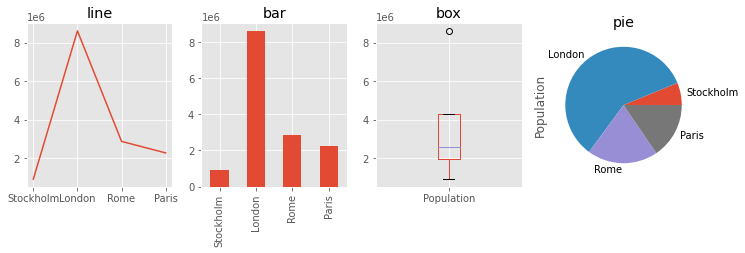

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')

### DataFrame

In [19]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United Kingdom"],
                   [2872086, "Italy"],
                   [2273305, "France"]])

In [20]:
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


In [21]:
df.index = ["Stockholm", "London", "Rome", "Paris"]

In [22]:
df.columns = ["Population", "State"]

In [23]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [24]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United Kingdom"],
                   [2872086, "Italy"],
                   [2273305, "France"]],
                  index=["Stockholm", "London", "Rome", "Paris"],
                  columns=["Population", "State"])

In [25]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                   "State": ["Sweden", "United Kingdom", "Italy","France"]},
                  index=["Stockholm", "London", "Rome", "Paris"])

In [26]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [27]:
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [28]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [29]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [30]:
df.mean()

Population    3667653.25
dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [32]:
df.dtypes

Population     int64
State         object
dtype: object

In [33]:
df_pop = pd.read_csv("european_cities.csv",delimiter=",", encoding="utf-8", header=0)

In [34]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [35]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [36]:
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))

In [37]:
df_pop["State"].values[:3] # contains extra white spaces

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [38]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [39]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

In [40]:
df_pop2 = df_pop.set_index("City")
df_pop2 = df_pop2.sort_index()
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [41]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)
df_pop3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895  
         Varna                    335819  
Croatia  Zagreb                   790017

In [42]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [43]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericPopulation                 528014
Name: (Sweden, Gothenburg), dtype: object

In [44]:
df_pop.set_index("City").sort_values(["State", "NumericPopulation"],ascending=[False, True]).head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [45]:
city_counts = df_pop.State.value_counts()
city_counts.head()

Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
Name: State, dtype: int64

In [46]:
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])
df_pop4 = df_pop3.sum(level="State").sort_values("NumericPopulation", ascending=False)
df_pop4.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [47]:
df_pop5 = (df_pop.drop("Rank", axis=1)
           .groupby("State").sum()
           .sort_values("NumericPopulation",
                        ascending=False))

Text(0.5, 0, 'Total pop. in top 105 cities')

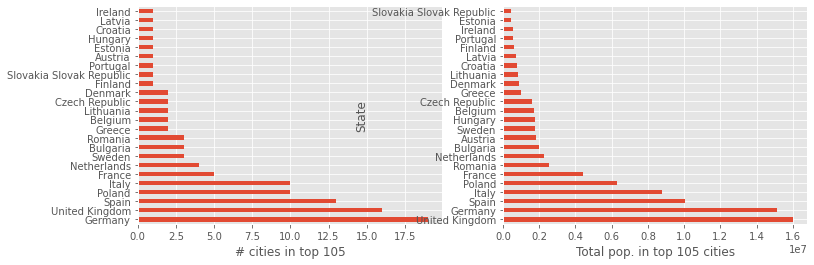

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")

### Time Series

In [49]:
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [51]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1",periods=31))
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int32

In [52]:
ts1["2015-1-3"]

2

In [53]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [54]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [55]:
ts1.index[2].nanosecond

0

In [56]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [57]:
import datetime
ts2 = pd.Series(np.random.rand(2),
                index=[datetime.datetime(2015, 1, 1), datetime.
                datetime(2015, 2, 1)])
ts2

2015-01-01    0.733214
2015-02-01    0.742074
dtype: float64

In [58]:
periods = pd.PeriodIndex([pd.Period('2015-01'),
                          pd.Period('2015-02'),
                          pd.Period('2015-03')])

In [59]:
ts3 = pd.Series(np.random.rand(3), index=periods)
ts3

2015-01    0.458361
2015-02    0.082667
2015-03    0.316148
Freq: M, dtype: float64

In [60]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]', freq='M')

In [61]:
ts2.to_period('M')

2015-01    0.733214
2015-02    0.742074
Freq: M, dtype: float64

In [62]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t",names=["time", "outdoor"])

In [63]:
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t",names=["time", "indoor"])

In [64]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [65]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
            .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [66]:
df1 = df1.set_index("time")
df2.time = (pd.to_datetime(df2.time.values, unit="s")
            .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time")
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


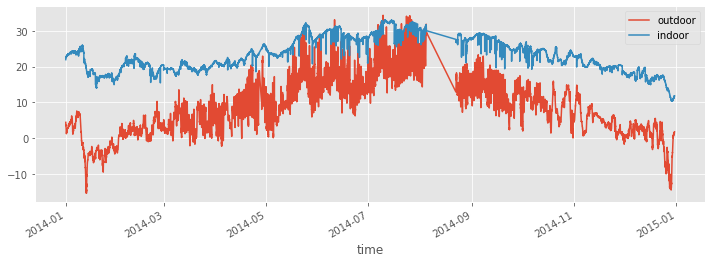

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  49548 non-null  float64
dtypes: float64(1)
memory usage: 774.2 KB


In [69]:
mask_jan = (df1.index >= "2014-1-1") & (df1.index < "2014-2-1")
df1_jan = df1[mask_jan]
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [70]:
df2_jan = df2["2014-1-1":"2014-1-31"]

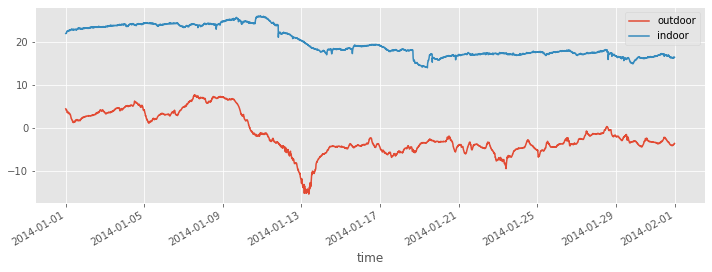

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

In [72]:
df1_month = df1.reset_index()
df1_month["month"] = df1_month.time.apply(lambda x: x.month)
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [73]:
df1_month = df1_month.groupby("month").aggregate(np.mean)
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month = df2_month.groupby("month").aggregate(np.mean)

In [74]:
df_month = df1_month.join(df2_month)
df_month.head(3)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [78]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean()
for df in [df1, df2]],axis=1)
df_month.head(3)

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


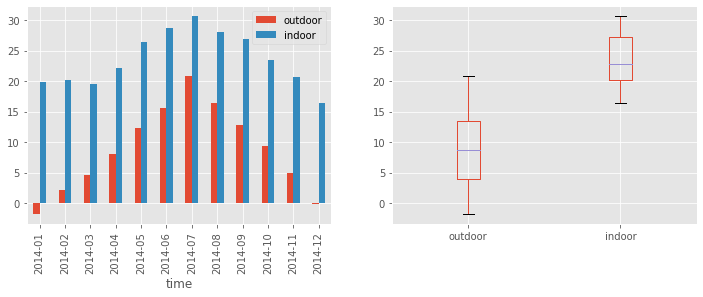

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

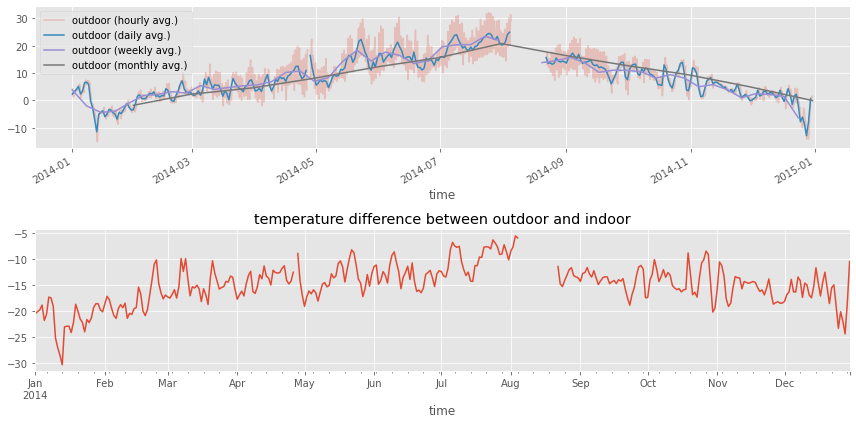

In [80]:
df1_hour = df1.resample("H").mean()
df1_hour.columns = ["outdoor (hourly avg.)"]
df1_day = df1.resample("D").mean()
df1_day.columns = ["outdoor (daily avg.)"]
df1_week = df1.resample("7D").mean()
df1_week.columns = ["outdoor (weekly avg.)"]
df1_month = df1.resample("M").mean()
df1_month.columns = ["outdoor (monthly avg.)"]
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)
df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")
fig.tight_layout()

In [81]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor":'None'}),
           df1.resample("5min").ffill().rename(columns={"outdoor":'ffill'}),
           df1.resample("5min").bfill().rename(columns={"outdoor":'bfill'})],
          axis=1).head()

,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


# The Seaborn Graphics Library

In [82]:
sns.set(style="darkgrid")

In [83]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t",
                  names=["time", "outdoor"])
df1.time = (pd.to_datetime(df1.time.values, unit="s")
            .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1 = df1.set_index("time").resample("10min").mean()

In [84]:
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t",
                  names=["time", "indoor"])
df2.time = (pd.to_datetime(df2.time.values, unit="s")
            .tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time").resample("10min").mean()

In [85]:
df_temp = pd.concat([df1, df2], axis=1)

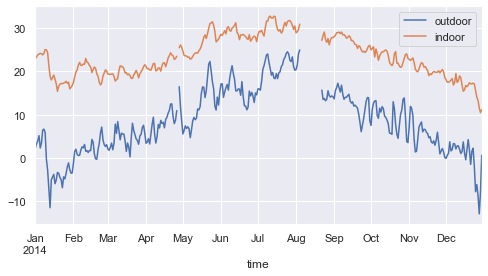

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)

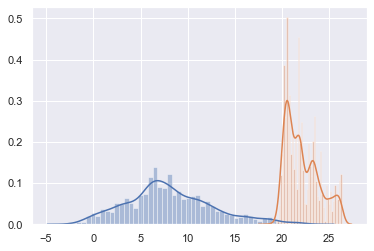

In [87]:
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

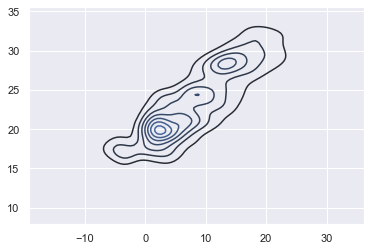

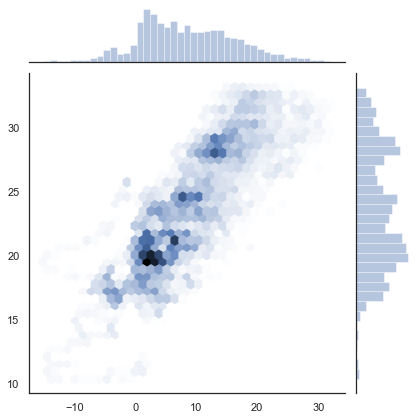

In [89]:
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values,
df_temp.resample("H").mean()["indoor"].dropna().values, shade=False)

with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,
                  df_temp.resample("H").mean()["indoor"].values,kind="hex")

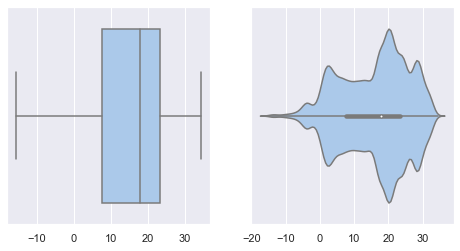

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(df_temp.dropna(), ax=ax2, palette="pastel")

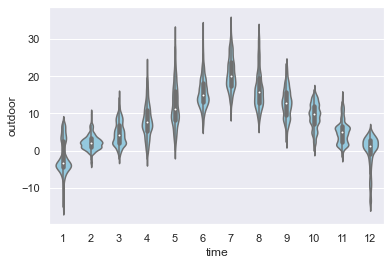

In [91]:
sns.violinplot(x=df_temp.dropna().index.month,y=df_temp.dropna().outdoor, color="skyblue");

In [92]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour

table = pd.pivot_table(df_temp, values='outdoor',
                       index=['month'], columns=['hour'],
                       aggfunc=np.mean)

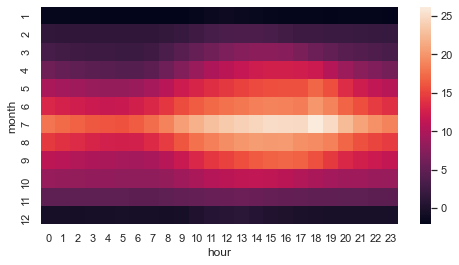

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax)